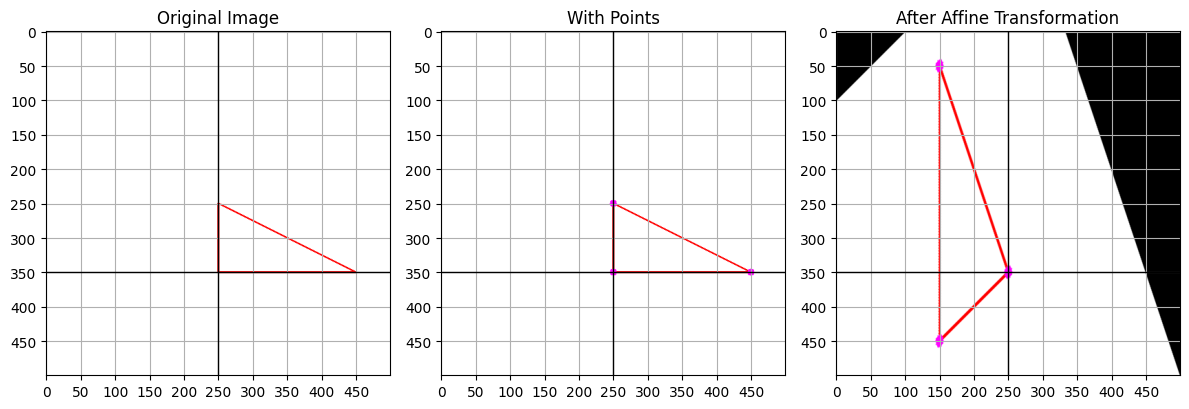

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_with_matplotlib(ax, img, title):
    """Shows an image using matplotlib capabilities"""
    # Convert BGR image to RGB
    img_RGB = img[:, :, ::-1]
    # Show the image using matplotlib:
    ax.imshow(img_RGB)
    ax.set_title(title)
    ax.grid(True)
    ax.set_xticks(np.arange(0, 500, 50))
    ax.set_yticks(np.arange(0, 500, 50))
    ax.axhline(350, color='black', linewidth=1)  # 添加 x 轴线
    ax.axvline(250, color='black', linewidth=1)  # 添加 y 轴线

# 创建一个空白的白色图像
width, height = 500, 500
image = np.ones((height, width, 3), dtype=np.uint8)*255
offset_x = 250
offset_y = 350

# 定义红色三角形的顶点
red_triangle_pts = np.array([[0+offset_x, 0+offset_y], 
                             [200+offset_x, 0+offset_y], 
                             [0+offset_x, -100+offset_y]],
                            np.int32)
red_triangle_pts = red_triangle_pts.reshape((-1, 1, 2))

# 定义蓝色三角形的顶点
blue_triangle_pts = np.array([[0+offset_x, 0+offset_y], 
                              [-100+offset_x, -300+offset_y], 
                              [-100+offset_x, 100+offset_y]],
                             np.int32)
blue_triangle_pts = blue_triangle_pts.reshape((-1, 1, 2))

# 绘制红色三角形
cv2.polylines(image, [red_triangle_pts], isClosed=True, color=(0, 0, 255), thickness=2)
# 绘制蓝色三角形
#cv2.polylines(image, [blue_triangle_pts], isClosed=True, color=(255, 0, 0), thickness=2)

# 创建一份副本用于显示点
image_points = image.copy()
cv2.circle(image_points, (0+offset_x, 0+offset_y), 5, (255, 0, 255), -1)
cv2.circle(image_points, (200+offset_x, 0+offset_y), 5, (255, 0, 255), -1)
cv2.circle(image_points, (0+offset_x, -100+offset_y), 5, (255, 0, 255), -1)

# 定义仿射变换的源点和目标点
pts_1 = np.float32([[0+offset_x, 0+offset_y], 
                    [200+offset_x, 0+offset_y], 
                    [0+offset_x, -100+offset_y]])

pts_2 = np.float32([[0+offset_x, 0+offset_y], 
                    [-100+offset_x, -300+offset_y], 
                    [-100+offset_x, 100+offset_y]])

# 计算仿射变换矩阵并应用
M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(image_points, M, (width, height))

# 创建三个子图并显示图像
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 显示原始图像、带点的图像、以及仿射变换后的图像
show_with_matplotlib(axes[0], image, 'Original Image')
show_with_matplotlib(axes[1], image_points, 'With Points')
show_with_matplotlib(axes[2], dst_image, 'After Affine Transformation')

plt.tight_layout()
plt.show()